In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

# data initialization
players = pd.read_csv('data/players.csv')
matches_2021_2s = pd.read_csv('data/matches_2021_2s.csv')
matches_2022_1s = pd.read_csv('data/matches_2022_1s.csv')
matches_2022_2s = pd.read_csv('data/matches_2022_2s.csv')
# data cleaning
players.player = players.player.apply(str.strip)
players.replace(to_replace="None", value=np.nan, inplace=True)

# map seeds to matches
map_2021_2s = dict(players[players.columns[[0, 1]]].dropna().to_dict('split')['data'])
matches_2021_2s['seed1'] = matches_2021_2s.t1p1.map(map_2021_2s)
matches_2021_2s['seed2'] = matches_2021_2s.t2p1.map(map_2021_2s)

map_2022_1s = dict(players[players.columns[[0, 2]]].dropna().to_dict('split')['data'])
matches_2022_1s['seed1'] = matches_2022_1s.p1.map(map_2022_1s)
matches_2022_1s['seed2'] = matches_2022_1s.p2.map(map_2022_1s)

map_2022_2s = dict(players[players.columns[[0, 3]]].dropna().to_dict('split')['data'])
matches_2022_2s['seed1'] = matches_2022_2s.t1p1.map(map_2022_2s)
matches_2022_2s['seed2'] = matches_2022_2s.t2p1.map(map_2022_2s)

matches_1s = pd.concat([matches_2022_1s]).reset_index(drop=True)
matches_2s = pd.concat([matches_2021_2s, matches_2022_2s]).reset_index(drop=True)

matches_1s.p1 = matches_1s.p1.apply(str.strip)
matches_1s.p2 = matches_1s.p2.apply(str.strip)
matches_1s.seed1 = matches_1s.seed1.apply(int)
matches_1s.seed2 = matches_1s.seed2.apply(int)
matches_2s.t1p1 = matches_2s.t1p1.apply(str.strip)
matches_2s.t1p2 = matches_2s.t1p2.apply(str.strip)
matches_2s.t2p1 = matches_2s.t2p1.apply(str.strip)
matches_2s.t2p2 = matches_2s.t2p2.apply(str.strip)
matches_2s.seed1 = matches_2s.seed1.apply(int)
matches_2s.seed2 = matches_2s.seed2.apply(int)


players['z_seed_2021_2'] = (players.seed_2021_2s.astype(float) - players.seed_2021_2s.astype(float).mean()) / players.seed_2021_2s.astype(float).std()
players['z_seed_2022_1'] = (players.seed_2022_1s.astype(float) - players.seed_2022_1s.astype(float).mean()) / players.seed_2022_1s.astype(float).std()
players['z_seed_2022_2'] = (players.seed_2022_2s.astype(float) - players.seed_2022_2s.astype(float).mean()) / players.seed_2022_2s.astype(float).std()
players['avg_norm_seed'] = np.nanmean(players.loc[:,['z' in x for x in players.columns]].astype(float), axis=1)

display(players)
display(matches_1s)
display(matches_2s)

,player,seed_2021_2s,seed_2022_1s,seed_2022_2s,z_seed_2021_2,z_seed_2022_1,z_seed_2022_2,avg_norm_seed
0,Kristian Banlaoi,NaN,1,NaN,NaN,-1.565248,NaN,-1.565248
1,Kevin Cooper,2,2,2,-1.056443,-1.341641,-1.142340,-1.180141
2,Rohan Chowla,3,3,1,-0.633866,-1.118034,-1.530305,-1.094068
3,Kalah Roche,1,4,3,-1.479020,-0.894427,-0.754375,-1.042608
4,Aaron Carter,1,5,3,-1.479020,-0.670820,-0.754375,-0.968072
5,Roman Ramirez,2,6,2,-1.056443,-0.447214,-1.142340,-0.881999
6,Coby Lovelace,4,7,6,-0.211289,-0.223607,0.409518,-0.008459
7,Paul Bartenfeld,6,8,8,0.633866,0.000000,1.185447,0.606438
8,Jason Jackson,4,9,4,-0.211289,0.223607,-0.366411,-0.118031
9,Jack Massingill,5,10,5,0.211289,0.447214,0.021554,0.226685


,event,match_number,p1,p2,score1,score2,seed1,seed2
0,2022_1s,1,Paul Bartenfeld,Jason Jackson,4,6,8,9
1,2022_1s,2,Kalah Roche,Gabe Silverstein,5,6,4,13
2,2022_1s,3,Aaron Carter,Leah Baetcke,2,6,5,12
3,2022_1s,4,Kevin Cooper,Carla Betancourt,5,6,2,15
4,2022_1s,5,Coby Lovelace,Jack Massingill,5,6,7,10
5,2022_1s,6,Rohan Chowla,Reagan Fryatt,6,5,3,14
6,2022_1s,7,Roman Ramirez,Evan Sooklal,6,4,6,11
7,2022_1s,8,Kalah Roche,Aaron Carter,3,6,4,5
8,2022_1s,9,Kevin Cooper,Coby Lovelace,6,5,2,7
9,2022_1s,10,Reagan Fryatt,Evan Sooklal,6,5,14,11


,event,match_number,t1p1,t1p2,t2p1,t2p2,score1,score2,seed1,seed2
0,2021_2s,1,Kalah Roche,Aaron Carter,Brian Tafazoli,Evan Sooklal,6,3,1,8
1,2021_2s,2,Coby Lovelace,Jason Jackson,Jack Massingill,Will Simpson,6,3,4,5
2,2021_2s,3,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,3,2,7
3,2021_2s,4,Rohan Chowla,Levin Lee,Paul Bartenfeld,Leah Baetcke,6,0,3,6
4,2021_2s,5,Brian Tafazoli,Evan Sooklal,Jack Massingill,Will Simpson,4,6,8,5
5,2021_2s,6,Ann Hall,Anna Brown,Paul Bartenfeld,Leah Baetcke,6,4,7,6
6,2021_2s,7,Kalah Roche,Aaron Carter,Coby Lovelace,Jason Jackson,5,6,1,4
7,2021_2s,8,Kevin Cooper,Roman Ramirez,Rohan Chowla,Levin Lee,5,6,2,3
8,2021_2s,9,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,5,2,7
9,2021_2s,10,Kalah Roche,Aaron Carter,Coby Lovelace,Jason Jackson,5,6,1,4


In [3]:
# CUPS TABLE
cups_table = pd.DataFrame()
cups_table['player'] = players.player

# number of games played in singles
list_games_played_1s = list()
for name in players.player:
    games_played_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            games_played_1s += 1
    list_games_played_1s.append(games_played_1s)
cups_table['gp_1s'] = list_games_played_1s

# number of games played in doubles
list_games_played_2s = list()
for name in players.player:
    games_played_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            games_played_2s += 1
    list_games_played_2s.append(games_played_2s)
cups_table['gp_2s'] = list_games_played_2s

# per-match total possible cups
matches_1s['tpc'] = matches_1s.apply(lambda row: max(row.score1, row.score2), axis=1)
matches_2s['tpc'] = matches_2s.apply(lambda row: max(row.score1, row.score2), axis=1)

# per-match percent cups hit
# matches_1s['pct_score1'] = matches_1s.apply(lambda row: row.score1 / row.tpc_1s * 100, axis=1)
# matches_1s['pct_score2'] = matches_1s.apply(lambda row: row.score1 / row.tpc_1s * 100, axis=1)
# matches_2s['pct_score2'] = matches_2s.apply(lambda row: row.score2 / row.tpc_2s * 100, axis=1)

# total number of cups scored in singles
list_cs_1s = list()
for name in players.player:
    cs_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            cs_1s += matches_1s.loc[i, 'score1']
        if name == matches_1s.loc[i, "p2"]:
            cs_1s += matches_1s.loc[i, 'score2']
    list_cs_1s.append(cs_1s)
cups_table['cs_1s'] = list_cs_1s

# total number of cups available in singles
list_ca_1s = list()
for name in players.player:
    ca_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            ca_1s += matches_1s.loc[i, 'tpc']
    list_ca_1s.append(ca_1s)
cups_table['ca_1s'] = list_ca_1s

# total number of cups scored in doubles (weighted by 0.5)
list_cs_2s = list()
for name in players.player:
    cs_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            cs_2s += matches_2s.loc[i, 'score1'] / 2
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            cs_2s += matches_2s.loc[i, 'score2'] / 2
    list_cs_2s.append(cs_2s)
cups_table['cs_2s'] = list_cs_2s

# total number of cups availabe in doubles
list_ca_2s = list()
for name in players.player:
    ca_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            ca_2s += matches_2s.loc[i, 'tpc'] / 2
    list_ca_2s.append(ca_2s)
cups_table['ca_2s'] = list_ca_2s

# cups scored per game in singles
cups_table['cs/gp_1s'] = cups_table.cs_1s / cups_table.gp_1s

# cups scored per game in doubles (weighted by 0.5)
cups_table['cs/gp_2s'] = cups_table.cs_2s / cups_table.gp_2s


# per-player percent cups hit, both singles and doubles (weighted by 0.5)
# THIS IS THE METRIC TO DETERMINE PAST PERFORMANCE, AND POTENTIAL SEEDING, favors efficiency regardless of participation
cups_table['pct_cs'] = cups_table.apply(lambda row: (row.cs_1s + row.cs_2s) / (row.ca_1s + row.ca_2s) * 100, axis=1)
# cups_table['rank_pct_cs'] = cups_table.pct_cs.rank(ascending=False).apply(int)

display(cups_table.sort_values('pct_cs', ascending=False).reset_index(drop=True))

,player,gp_1s,gp_2s,cs_1s,ca_1s,cs_2s,ca_2s,cs/gp_1s,cs/gp_2s,pct_cs
0,Roman Ramirez,9,10,62,63,26.5,30.0,6.888889,2.650000,95.161290
1,Levin Lee,0,11,0,0,34.0,36.0,NaN,3.090909,94.444444
2,Rohan Chowla,6,11,42,48,34.0,36.0,7.000000,3.090909,90.476190
3,Kristian Banlaoi,3,0,16,18,0.0,0.0,5.333333,NaN,88.888889
4,Coby Lovelace,2,10,10,12,29.5,33.0,5.000000,2.950000,87.777778
5,Kevin Cooper,5,10,26,30,26.5,30.0,5.200000,2.650000,87.500000
6,Jason Jackson,3,9,14,18,28.0,31.5,4.666667,3.111111,84.848485
7,Jack Massingill,4,7,20,24,18.0,21.0,5.000000,2.571429,84.444444
8,Reagan Fryatt,4,0,20,24,0.0,0.0,5.000000,NaN,83.333333
9,Leah Baetcke,5,4,30,33,8.0,13.5,6.000000,2.000000,81.720430


In [4]:
# WIN-LOSS TABLE: favors winners and those with greater participation

wl_table = pd.DataFrame()
wl_table['player'] = players.player

# wins in singles
list_W_1s = list()
for name in players.player:
    W_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                W_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                W_1s += 1
    list_W_1s.append(W_1s)
wl_table['W_1s'] = list_W_1s

# regular-time losses in singles
list_L_1s = list()
for name in players.player:
    L_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] == 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    L_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    L_1s += 1
    list_L_1s.append(L_1s)
wl_table['L_1s'] = list_L_1s

# overtime losses in singles
list_OTL_1s = list()
for name in players.player:
    OTL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] > 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    OTL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    OTL_1s += 1
    list_OTL_1s.append(OTL_1s)
wl_table['OTL_1s'] = list_OTL_1s

# wins in doubles
list_W_2s = list()
for name in players.player:
    W_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                W_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                W_2s += 1
    list_W_2s.append(W_2s)
wl_table['W_2s'] = list_W_2s

# regular-time losses in doubles
list_L_2s = list()
for name in players.player:
    L_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] == 6):
                L_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] == 6):
                L_2s += 1
    list_L_2s.append(L_2s)
wl_table['L_2s'] = list_L_2s

# overtime losses in doubles
list_OTL_2s = list()
for name in players.player:
    OTL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] > 6):
                OTL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] > 6):
                OTL_2s += 1
    list_OTL_2s.append(OTL_2s)
wl_table['OTL_2s'] = list_OTL_2s

wl_table['GP'] = cups_table.gp_1s + cups_table.gp_2s

# total wins (2 points)
wl_table['W'] = wl_table.W_1s + wl_table.W_2s

# total losses (0 points)
wl_table['L'] = wl_table.L_1s + wl_table.L_2s

# total overtime lossess (1 point)
wl_table['OTL'] = wl_table.OTL_1s + wl_table.OTL_2s

# total points
wl_table['PTS'] = (wl_table.W * 2) + (wl_table.L * 0) + (wl_table.OTL * 1)

wl_table['W_PCT'] = wl_table.PTS / (wl_table.GP * 2) * 100

display(wl_table.sort_values('PTS', ascending=False).reset_index(drop=True))

# win-loss as overdogs

# win-loss as underdogs

,player,W_1s,L_1s,OTL_1s,W_2s,L_2s,OTL_2s,GP,W,L,OTL,PTS,W_PCT
0,Roman Ramirez,8,0,1,7,3,0,19,15,3,1,31,81.578947
1,Rohan Chowla,4,1,1,8,3,0,17,12,4,1,25,73.529412
2,Kevin Cooper,3,2,0,7,3,0,15,10,5,0,20,66.666667
3,Levin Lee,0,0,0,8,3,0,11,8,3,0,16,72.727273
4,Jason Jackson,1,2,0,5,3,1,12,6,5,1,13,54.166667
5,Coby Lovelace,0,2,0,6,3,1,12,6,5,1,13,54.166667
6,Jack Massingill,2,2,0,4,3,0,11,6,5,0,12,54.545455
7,Leah Baetcke,3,1,1,0,3,1,9,3,4,2,8,44.444444
8,Gabe Silverstein,1,2,0,3,2,0,8,4,4,0,8,50.000000
9,Aaron Carter,1,2,0,3,4,0,10,4,6,0,8,40.000000


In [5]:

## FA DIFFERENTIAL TABLE

fa_table = pd.DataFrame()
fa_table['player'] = players.player

# pf_1s: 'points for' player
# pa_1s: 'points against' player
# +/-_1s: 'net differential' player
list_pf_1s = list()
list_pa_1s = list()
for name in players.player:
    pf_1s = 0
    pa_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            pf_1s += matches_1s.loc[i, "score1"]
            pa_1s += matches_1s.loc[i, "score2"]
        if name == matches_1s.loc[i, "p2"]:
            pf_1s += matches_1s.loc[i, "score2"]
            pa_1s += matches_1s.loc[i, "score1"]
            
    list_pf_1s.append(pf_1s)
    list_pa_1s.append(pa_1s)

fa_table['PF_1s'] = list_pf_1s
fa_table['PA_1s'] = list_pa_1s
fa_table['+/-_1s'] = fa_table['PF_1s'] - fa_table['PA_1s']

# score differential in doubles (weighted by 0.5 or weighted by 1.0) idk!

# pf_2s: 'points for' player
# pa_2s: 'points against' player
# +/-_2s: 'net differential' player
list_pf_2s = list()
list_pa_2s = list()
for name in players.player:
    pf_2s = 0
    pa_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            pf_2s += matches_2s.loc[i, "score1"]
            pa_2s += matches_2s.loc[i, "score2"]
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            pf_2s += matches_2s.loc[i, "score2"]
            pa_2s += matches_2s.loc[i, "score1"]
            
    list_pf_2s.append(pf_2s)
    list_pa_2s.append(pa_2s)

weight = 1

fa_table['PF_2s'] = [x * weight for x in list_pf_2s]
fa_table['PA_2s'] = [x * weight for x in list_pa_2s]
fa_table['+/-_2s'] = fa_table['PF_2s'] - fa_table['PA_2s']

# cummulative
fa_table['GP'] = cups_table.gp_1s + cups_table.gp_2s
fa_table['PF'] = fa_table.PF_1s + fa_table.PF_2s
fa_table['PA'] = fa_table.PA_1s + fa_table.PA_2s
fa_table['+/-'] = fa_table.PF - fa_table.PA

display(fa_table.sort_values('+/-', ascending=False).reset_index(drop=True))

,player,PF_1s,PA_1s,+/-_1s,PF_2s,PA_2s,+/-_2s,GP,PF,PA,+/-
0,Roman Ramirez,62,42,20,53,49,4,19,115,91,24
1,Rohan Chowla,42,42,0,68,50,18,17,110,92,18
2,Levin Lee,0,0,0,68,50,18,11,68,50,18
3,Kevin Cooper,26,22,4,53,49,4,15,79,71,8
4,Jack Massingill,20,21,-1,36,32,4,11,56,53,3
5,Coby Lovelace,10,12,-2,59,55,4,12,69,67,2
6,Kristian Banlaoi,16,15,1,0,0,0,3,16,15,1
7,Gabe Silverstein,13,17,-4,27,22,5,8,40,39,1
8,Will Simpson,0,0,0,28,29,-1,6,28,29,-1
9,Jason Jackson,14,16,-2,56,56,0,12,70,72,-2


In [6]:
# hypothetical consumed standards
hcs_table = pd.DataFrame()
hcs_table['player'] = players.player

# hypothetical consumed standards in singles
list_hcs_1s = list()
for name in players.player:
    hcs_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            hcs_1s += int((matches_1s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_1s.append(hcs_1s)
hcs_table['hcs_1s'] = list_hcs_1s

# hypothetical consumed standards in doubles
list_hcs_2s = list()
for name in players.player:
    hcs_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            hcs_2s += int((matches_2s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_2s.append(hcs_2s)
hcs_table['hcs_2s'] = list_hcs_2s

# hypothetical consumed standards
hcs_table['hcs'] = hcs_table.hcs_1s + hcs_table.hcs_2s

# hypothetical consumed standards per event
hcs_table['hcs/event'] = hcs_table.hcs / ((len(players.columns) - 1) - (players[players.columns[1:]].isna().sum(axis=1)))

display(hcs_table.sort_values('hcs/event', ascending=False).reset_index(drop=True))

,player,hcs_1s,hcs_2s,hcs,hcs/event
0,Rohan Chowla,10,13,23,3.285714
1,Roman Ramirez,12,10,22,3.142857
2,Levin Lee,0,13,13,2.600000
3,Kevin Cooper,5,10,15,2.142857
4,Jason Jackson,3,12,15,2.142857
5,Coby Lovelace,2,12,14,2.000000
6,Carla Betancourt,5,0,5,1.666667
7,Gabe Silverstein,3,5,8,1.600000
8,Leah Baetcke,6,5,11,1.571429
9,Jack Massingill,4,7,11,1.571429


,player,total_seeds_1s,total_seeds_2s,avg_norm_total_seeds_1s,avg_norm_total_seeds_2s,SOV_1s,SOV_2s,SOS,SOV,PTS,z_SOS,z_SOV,z_PTS,performance,cinderella
0,Roman Ramirez,66,40,0.488889,0.500000,42.422757,50.437463,0.505556,0.464301,31,0.201271,0.809279,2.858922,0.978728,1.010550
1,Carla Betancourt,23,0,0.306667,NaN,62.626263,NaN,0.693333,0.626263,6,1.771467,1.575196,-0.242982,0.682346,3.346663
2,Rohan Chowla,59,42,0.655556,0.477273,59.005848,56.662846,0.433586,0.578343,25,-0.400538,1.348586,2.114465,0.492692,0.948047
3,Reagan Fryatt,25,0,0.416667,NaN,27.083333,NaN,0.583333,0.270833,4,0.851648,-0.105631,-0.491135,0.443875,0.746017
4,Jack Massingill,33,27,0.550000,0.482143,47.083333,33.125000,0.483929,0.401042,12,0.020427,0.510125,0.501475,0.393066,0.530552
5,Gabe Silverstein,18,15,0.400000,0.375000,33.333333,44.166667,0.612500,0.387500,8,1.095539,0.446086,0.005170,0.311286,1.541626
6,Yvonne Nguyen,0,11,NaN,0.687500,NaN,NaN,0.312500,0.000000,0,-1.413057,-1.386403,-0.987439,0.306426,-2.799460
7,Leah Baetcke,28,15,0.373333,0.468750,41.111111,NaN,0.578958,0.411111,8,0.815064,0.557743,0.005170,0.287351,1.372808
8,Coby Lovelace,12,29,0.400000,0.362500,NaN,46.525178,0.618750,0.465252,13,1.147802,0.813775,0.625551,0.275494,1.961577
9,Brian Tafazoli,0,6,NaN,0.375000,NaN,NaN,0.625000,0.000000,0,1.200064,-1.386403,-0.987439,0.259230,-0.186339


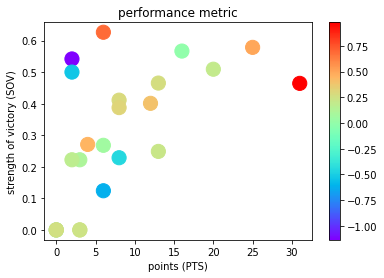

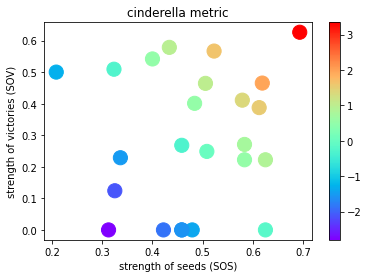

In [14]:
str_table = pd.DataFrame()
str_table['player'] = players.player

# strength of schedule (how difficult were the opposing seeds), sum the seeds of people's wins and losses
# this is independent of your own ranking

# total seeds in singles
list_total_seeds_1s = list()
for name in players.player:
    total_seeds_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1"]]):
            total_seeds_1s += matches_1s.loc[i, "seed2"] # - matches_1s.loc[i, "seed1"]
        if any([name == matches_1s.loc[i, x] for x in ["p2"]]):
            total_seeds_1s += matches_1s.loc[i, "seed1"] # - matches_1s.loc[i, "seed2"]
    list_total_seeds_1s.append(total_seeds_1s)
str_table['total_seeds_1s'] = list_total_seeds_1s

# total seeds in doubles
list_total_seeds_2s = list()
for name in players.player:
    total_seeds_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed2"] # - matches_2s.loc[i, "seed1"]
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed1"] # - matches_2s.loc[i, "seed2"]
    list_total_seeds_2s.append(total_seeds_2s)
str_table['total_seeds_2s'] = list_total_seeds_2s

# average total seeds in singles by ratio to highest seed (norm) and by match (avg)
# this is a metric for how hard someone's journey or matchup was
    # lower numbers faced on average a harder opponent, whether they beat them or not
str_table['avg_norm_total_seeds_1s'] = str_table.total_seeds_1s / max(matches_1s.seed1) / cups_table.gp_1s

# average total seeds in doubles by ratio to highest seed (norm) and by match (avg)
str_table['avg_norm_total_seeds_2s'] = str_table.total_seeds_2s / max(matches_2s.seed1) / cups_table.gp_2s


# SOV metric
# the composite win percentage of all the teams you've beaten

map_player2wpct = dict(wl_table.loc[:, ["player", "W_PCT"]].dropna().to_dict('split')['data'])

# SOV in singles
list_SOV_1s = list()
for name in players.player:
    SOV_1s = 0
    n_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p2"]]
                n_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p1"]]
                n_1s +=1
    if n_1s == 0:
        list_SOV_1s.append(np.NaN)
    else:    
        list_SOV_1s.append(SOV_1s / n_1s)
str_table['SOV_1s'] = list_SOV_1s

# SOV in doubles
list_SOV_2s = list()
for name in players.player:
    SOV_2s = 0
    n_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't2p1']] + map_player2wpct[matches_2s.loc[i, 't2p2']]) / 2
                n_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't1p1']] + map_player2wpct[matches_2s.loc[i, 't1p2']]) / 2
                n_2s += 1
    if n_2s == 0:
        list_SOV_2s.append(np.NaN)
    else:
        list_SOV_2s.append(SOV_2s / n_2s)
str_table['SOV_2s'] = list_SOV_2s

str_table['SOS'] = 1 - str_table[['avg_norm_total_seeds_1s', 'avg_norm_total_seeds_2s']].mean(axis=1)


# overall SOV
list_SOV = list()
for (i, row) in str_table.iterrows():
    if np.isnan(row.SOV_1s) and np.isnan(row.SOV_2s):
        list_SOV.append(0)
    elif np.isnan(row.SOV_1s):
        list_SOV.append(row.SOV_2s)
    elif np.isnan(row.SOV_2s):
        list_SOV.append(row.SOV_1s)
    else:
        list_SOV.append((row.SOV_1s + row.SOV_2s) / 2) 
str_table['SOV'] = [x/100 for x in list_SOV]

str_table['PTS'] = wl_table.PTS

str_table['z_SOS'] = stats.zscore(str_table.SOS)
str_table['z_SOV'] = stats.zscore(str_table.SOV)
str_table['z_PTS'] = stats.zscore(str_table.PTS)

### OLD FORMULAS
# str_table['performance'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / (1 - str_table.SOS)
# str_table['cinderella'] = str_table.SOS * str_table.SOV
# str_table['exceeds_expectations'] = (str_table.z_PTS) - stats.zscore(wl_table.GP)
# str_table['exceeds_expectations'] = (str_table.z_SOV) + stats.zscore(wl_table.GP)
# str_table['underrated'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / ((1 - str_table.SOV) * (1 - str_table.SOS))
###

# SOS: strength of seed, formula based on opponent seed
# SOV: strength of victory, formula based on opponent win percentage
# expectations: a really low assigned seed and (high strength of victory | high number of wins)
# cinderella: like how much do they exceed expectations

performance_w = 0.5
str_table['performance'] = (players.avg_norm_seed * (performance_w)) + (stats.zscore(wl_table.W) * (1 - performance_w))
str_table['cinderella'] = str_table.z_SOS + str_table.z_SOV

display(str_table.sort_values('performance', ascending=False).reset_index(drop=True))

plt.scatter(
    x=str_table.PTS,
    y=str_table.SOV,
    s=200,
    c=str_table.performance,
    cmap='rainbow'
    )

plt.title('performance metric')
plt.xlabel('points (PTS)')
plt.ylabel('strength of victory (SOV)')
plt.colorbar()

plt.show()

plt.scatter(
    x=str_table.SOS,
    y=str_table.SOV,
    s=200,
    c=str_table.cinderella,
    cmap='rainbow'
    )

plt.title('cinderella metric')
plt.xlabel('strength of seeds (SOS)')
plt.ylabel('strength of victories (SOV)')
plt.colorbar()

plt.show()

# change OTL to RL
# separate Ws worth 2 points and EW (elimination Ws worth 1 point)


,player,+/-,W_PCT,z_+/-,z_W_PCT,anti-nebraska
0,Leah Baetcke,-8,44.444444,-0.910208,0.093227,1.003435
1,Carla Betancourt,-2,60.000000,-0.227552,0.768946,0.996498
2,Helen Dunn,-5,50.000000,-0.568880,0.334555,0.903435
3,Noah Dale,-5,50.000000,-0.568880,0.334555,0.903435
4,Jason Jackson,-2,54.166667,-0.227552,0.515551,0.743103
5,Reagan Fryatt,-2,50.000000,-0.227552,0.334555,0.562107
6,Will Simpson,-1,50.000000,-0.113776,0.334555,0.448331
7,Coby Lovelace,2,54.166667,0.227552,0.515551,0.287999
8,Aaron Carter,-3,40.000000,-0.341328,-0.099835,0.241493
9,Gabe Silverstein,1,50.000000,0.113776,0.334555,0.220779


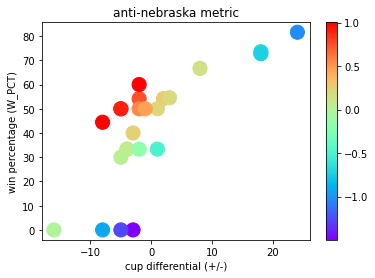

In [8]:
# sickos metric: nebraska metric: good win differential, bad win percentage
# anti-nebraska metric: bad win differential, good win percentage (I think leah)
sickos_table = pd.DataFrame()
sickos_table['player'] = players.player
sickos_table['+/-'] = fa_table['+/-']
sickos_table['W_PCT'] = wl_table['W_PCT']
sickos_table['z_+/-'] = stats.zscore(fa_table['+/-'])
sickos_table['z_W_PCT'] = stats.zscore(wl_table['W_PCT'])

sickos_table['anti-nebraska'] =  - sickos_table['z_+/-'] + sickos_table['z_W_PCT']
# sickos_table['nebraska'] = abs(sickos_table['z_+/-']) / abs(sickos_table['z_W_PCT'])
# sickos_table['nebraska'] = ((fa_table['+/-'] / (max(fa_table['+/-']) - min(fa_table['+/-']))) / (wl_table['W_PCT'] / 100)).replace([-np.inf], [np.NaN])

display(sickos_table.sort_values('anti-nebraska', ascending=False).reset_index(drop=True))

plt.scatter(
    x=fa_table['+/-'],
    y=wl_table['W_PCT'],
    s=200,
    c=sickos_table['anti-nebraska'],
    cmap='rainbow'
)

plt.title('anti-nebraska metric')
plt.xlabel('cup differential (+/-)')
plt.ylabel('win percentage (W_PCT)')
plt.colorbar()

plt.show()

# top 10 moments in 2022 pong history

# recommended seeding going into next singles tournament,
    # answer: in the order of total PTS with the tie break as win pct
